In [1]:
from AC import createFigures
import AC
from scipy.spatial import distance
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def getRandomPoint(data:'Conjunto de Datos', k:'Numero de puntos a generar'):
    rangeValues = np.c_[data.min(axis=0),data.max(axis=0)]
    randomPoints = [[np.random.uniform(*r) for r in rangeValues] for _ in range(k)]
    return np.array(randomPoints)

In [3]:
def getRandomPoint2(X, k):
    n = X.shape[0]
    index = np.arange(n)
    choice = np.random.choice(index, size=k,replace=False)
    return X[choice]

In [4]:
def getRandomPoint(data:'Conjunto de Datos', k:'Numero de puntos a generar'):
    rangeValues = np.c_[data.min(axis=0),data.max(axis=0)]
    randomPoints = [[np.random.uniform(*r) for r in rangeValues] for _ in range(k)]
    return np.array(randomPoints)

In [5]:
def K_means(X:'Data set',k:'Number of centers', *, distance=distance.euclidean, iterations=2):
    for _ in range(iterations):
        # Create k random centers
        K = getRandomPoint2(X,k=k)
        # Number of instances
        n = X.shape[0]
        # Number of dimensions
        d = X.shape[1]
        # Array to count points closer to the center
        count = np.zeros((k,1))
        # Array to sum the point to the closser centers
        dist = np.zeros((k,d))
        # Array to save which center belong to a vector
        centers = np.zeros((n,1), dtype='uint8')
        # For every vector\instance
        for i,x in enumerate(X):
            # Obtian the center closer to the vector
            centers[i] = np.argmin([distance(k,x) for k in K])
            # Add one to the counter of the specific center
            count[centers[i]] += 1
            # Add the vector depending the center
            dist[centers[i]] += x
        K = dist/count
    return K, centers

In [6]:
n = 100
X1 = np.c_[np.random.normal(-10,5, size=n),np.random.normal(-10,5, size=n)]#,np.random.normal(5,2, size=n)]
X2 = np.c_[np.random.normal(10,5, size=n),np.random.normal(10,5, size=n)]#,np.random.normal(5,2, size=n)]
X3 = np.c_[np.random.normal(-10,5, size=n),np.random.normal(10,5, size=n)]
X = np.r_[X1,X2,X3]

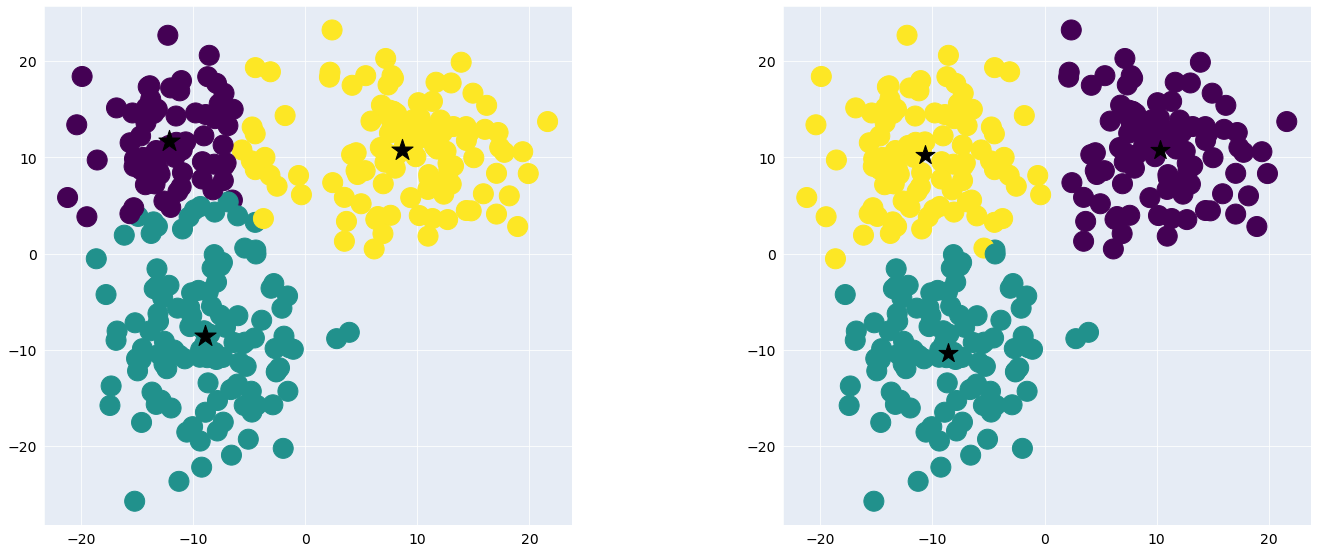

In [7]:
n = 3
s = KMeans(n_clusters=n)
s.fit(X)

p, l = K_means(X, k=n, iterations=15)

ax1, ax2 = createFigures(figsize=(11,9), n_axes=2, columns=2)
cmap = plt.get_cmap('Dark2', 5)
ax1.scatter(x=X[:,0], y=X[:,1], c=l, s=400);
ax2.scatter(x=X[:,0], y=X[:,1], c=s.labels_, s=400);
ax2.scatter(x=s.cluster_centers_[:,0], y=s.cluster_centers_[:,1], s=400, marker='*', color='k');
ax1.scatter(x=p[:,0], y=p[:,1], s=500, marker='*', color='k');
#ax.set_xticks([0]);
#ax.set_yticks([0]);

In [8]:
n = 4
X1 = np.r_[np.random.normal(-15,2, size=n),np.random.normal(0,2, size=n),np.random.normal(15,2, size=n)]

In [9]:
k = 3

In [10]:
c, l = K_means(X1.reshape(-1,1), k=3, iterations=50)

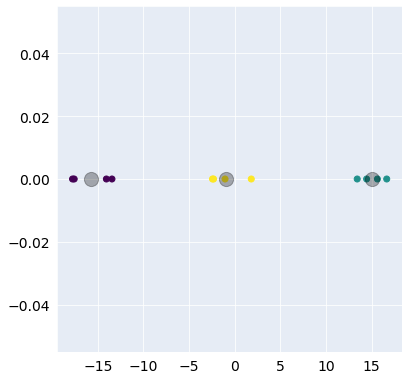

In [11]:
ax = createFigures()
ax.scatter(x=X1, y=np.zeros_like(X1), c=l);
ax.scatter(x=c.ravel(), y=np.zeros_like(c.ravel()), color='k', s=200, alpha=0.3);

In [12]:
k = 3
X1 = X1.reshape(-1,1)
X1

array([[-14.06647477],
       [-13.45542473],
       [-17.77777727],
       [-17.59605399],
       [ -2.43271515],
       [ -1.0577932 ],
       [  1.81671903],
       [ -2.31773084],
       [ 13.43018192],
       [ 16.66479474],
       [ 14.46025823],
       [ 15.64588168]])

In [13]:
# Create k random centers
centers = getRandomPoint(X1,k=3)
centers

array([[ 1.10243581e+01],
       [-1.53557980e+01],
       [-1.37912197e-02]])

In [14]:
# Number of instances
n = X1.shape[0]
n

12

In [15]:
# Number of dimensions
d = X1.shape[1]
d

1

In [ ]:
# Array to save which center belong to a vector
labels = np.zeros(n, dtype='uint8')
# For every vector\instance
for i,vector in enumerate(X1):
    # Obtian the center closer to the vector
    labels[i] = np.argmin([distance.euclidean(center,vector) for center in centers])

labels

In [ ]:
[for ]